# Coursework 1 - Mathematics for Machine Learning

## CID: 01843211

**Colab link:** https://colab.research.google.com/drive/1rP1MUlRn9mO4HsI01nL80xRNbIGzTZLt?usp=sharing

***
***

**References:**  (the following are used varingly throughout)

Lee, J., Bahri, Y., Novak, R., Schoenholz, S. S., Pennington, J.,
and Sohl-Dickstein, J. (2017). Deep neural networks as gaussian processes. *arXiv
preprint arXiv:1711.00165.*

Chong, E.K.P. and Zak, S.H (2013). An Introduction to Optimization.
Fourth edition. Wiley.

Matthews, A. G. d. G., Rowland, M., Hron, J., Turner,
R. E., and Ghahramani, Z. (2018). Gaussian process behaviour in wide deep
neural networks. *arXiv preprint arXiv:1804.11271*

***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

Let $(\mathbf{x},\mathbf{y})$ be sampled from the data-generating distribution $D$. Let $f$ be a classifier in function space $\hat{\mathcal{F}}$ and let $L$ be a loss function which is a metric or pseudo-metric. Then the risk $R$ corresponding to $f$ is defined $$R(f)=\mathbb{E}_D[L(f(\mathbf{x}, \mathbf{y})]$$

This definition assumes that $(\mathbf{x}, \mathbf{y})$ are drawn from the true underlying distribution $\mathcal{D}$, making $R(f)$ a measure of how well $f$ is expected to perform on the entire data space, not just the observed samples. Herein lies the key difference between this true risk $R(f)$ and the empirical risk

In statistical learning we seek an $\hat{f}\in \hat{\mathcal{F}}$ which minimises this true risk, i.e
$$\hat{f}\in\text{arg min}_{f\in\hat{\mathcal{F}}}R(f)$$

However, since $\mathcal{D}$ is unknown in real-world scenarios, we cannot compute $R(f)$ directly. Instead, we approximate it using the empirical risk $\hat{R}(f)$, which is calculated based on the observed dataset $D$:


$$\hat{R}(f)=\frac{1}{n}\sum_{i=1}^n L(f(\mathbf{x}^i), \mathbb{y}^i)$$

For large datasets, this is approximately equal to the true risk and allows us to learn a function

$$f^*=\text{arg min}_{f\in\mathcal{F}}\hat{R}(f)$$

where $\mathcal{F}$ is a choice of function class that we believe is likely to contain the true function, or a suitable approximation thereof. If $\mathcal{F}$ is well-chosen this will approximate the $\hat{f}$ defined above.

The key difference between these two concepts is that the true risk is an unknown, yet crucial, measurement of the suitability of the learned function $f$ on the data distribution $D$. Given the limitations of our finite set of samples $(\mathbf{x},\mathbf{y})\sim D$, we must use a suitable approximation, which is given by the empirical risk. It can be shown that this is the best estimator of the true risk given the samples.

#### Question 2 ('Large' or 'rich' hypothesis class):

A rich hypothesis class $\mathcal{F}$ will result in the learned function minimising the training error. For example, consider a dataset of $n$ points - if the function class is all degree $n-1$ polynomials, then the learned function will perfectly interpolate all points in the dataset.

However, this can be undesirable, as often variations in the data are due to random noise. We instead seek a simpler function will will *generalise* better, and thus minimise the *generalisation error*, which is exactly the difference between $f^*$ and $\hat{f}$ above.

Linear regression is an example of a basic function class. We approximate relationships with linear maps from the feature space to the output space. This performs well with simple relationships, and exhibits low variance, however can be biased with more complex, e.g. polynomial, relationships.

On th eother hand, neural nets are examples of a very rich function classse can capture much more complex relationships, however will overfit highly, with high variance, for a simple linear map, and therefore will exhibit high generalisation error.

#### Question 3 (Dataset splitting):

In the case that validation data is drawn from the same distribution as training data i.i.d, it would be fair to assume that model performance on unseen data is similar to that on that validation data.

However, there are exceptions to this rule. Consider a time series generated by a non-stationary model, for example S&P 500 close. If the training data is 2023 data, and the validation data is Jan/Feb 2024 data, it would be unreasonable to asssume that accuracy will perform as well when evluated on the remainder of 2024 data.

#### Question 4 (Occam’s razor):

Occam's Razor suggests that among competing hypotheses that predict equally well, the simplest one should be selected. This simplicity is often equated with a model or explanation that makes the fewest assumptions.

In machine learning, Occam's Razor is interpreted as a guideline for model selection. The principle advises choosing the simplest model that adequately fits the data. This approach is grounded in the idea that simpler models are less likely to overfit the training data. Overfitting occurs when a model captures noise or random fluctuations in the training set rather than the underlying distribution, leading to poor generalisation to new, unseen data.

When dealing with naturally occurring data, such as images, the application of Occam's Razor becomes particularly relevant. Images are high-dimensional data with complex, intricate structures. Models trained on image data, such as convolutional neural networks, can easily become overly complex, with millions of parameters capable of fitting the training data very closely.

Applying Occam's Razor in this context means preferring simpler models that still capture the essential patterns in the image data without memorizing specific details. This simplicity helps in generalizing better to unseen images by focusing on broader, more universal features rather than specifics of the training set.

For image data, a simpler model according to Occam's Razor would still need to be complex enough to handle the data's inherent complexity but not so complex that it learns the noise or irrelevant details. This balance helps in achieving good performance on new images that were not part of the training process.

Simpler models are often more interpretable and computationally efficient. This efficiency is crucial for deploying models in real-world applications where computational resources may be limited, and understanding model predictions is important for trust and transparency.

#### Question 5 (Generalisation error):


The generalisation error for a given model $f$ is the difference between $R$ and $\hat{R}$. This quantifies how well the model performs on new, unseen data compared to the training data on which it was trained. For a "good" model, the generalisation error should be small. A small generalisation error indicates that the model effectively captures the underlying patterns or distributions of the data without being overly fitted to the noise or specific details of the training set.

A model with a small generalisation error has successfully learned the true underlying patterns in the data. This ability suggests that the model can apply what it has learned from the training data to unseen data, making accurate predictions across a variety of scenarios that were not specifically presented during training.

A good model strikes an optimal balance between bias (the error from erroneous assumptions in the learning algorithm) and variance (the error from sensitivity to small fluctuations in the training set). A small generalisation error indicates that the model has achieved this balance, being neither too simple (high bias and unable to capture complex patterns) nor too complex (high variance and overfitting to the training data).

Overfitting occurs when a model learns the noise or random fluctuations in the training data rather than the actual signal. A model with a small generalisation error is robust against overfitting, meaning it has generalized well from the training data to unseen data, focusing on the signal rather than the noise.

The ultimate goal of a machine learning model is to perform well on real-world data, which is often different in various ways from the data used during training. A small generalisation error implies that the model is likely to be effective and reliable when deployed in real-world applications, accurately handling new examples that reflect the complexities and variations of real-world scenarios.

Since we cannot compute $R$ as we do not know the underlying distribution, we approximate it as the difference between two empirical errors $\hat{R}$, when one is taken on train data and the other on test data.

#### Question 6 (Rademacher complexity pt1):


The empirical Rademacher complexity of a function class $ \mathcal{F} $ with respect to a sample $ S = \{x_1, x_2, \ldots, x_n\} $ is defined as follows:

$$
\hat{\mathcal{R}}_S(\mathcal{F}) = \mathbb{E}_{\sigma}\left[\sup_{f \in \mathcal{F}}\left(\frac{2}{n} \sum_{i=1}^n \sigma_i f(x_i)\right)\right]
$$

Where:

- $S$ represents a sample of $n$ points drawn from a distribution $\mathcal{D}$.
- $\mathcal{F}$ is a class of functions where each function $f$ maps an input space $\mathcal{X}$ to real numbers $\mathbb{R}$.
- $\sigma = (\sigma_1, \sigma_2, \ldots, \sigma_n)$ is a sequence of independent Rademacher variables, each taking values $-1$ or $+1$ with equal probability.
- $\mathbb{E}_{\sigma}$ denotes the expectation over all possible realizations of the Rademacher sequence $\sigma$.

The empirical Rademacher complexity measures the expected maximum correlation between the functions in $\mathcal{F}$ and a random pattern of signs provided by $\sigma$ on the sample $S$. It serves as an indicator of the function class's ability to fit random noise, which is directly related to its potential for overfitting and its generalization capacity.

A high value of empirical Rademacher complexity suggests that the function class $ \mathcal{F} $ has a strong ability to fit random patterns. Specifically, it means that there exist functions within $ \mathcal{F} $ that can align closely with random assignments of labels (as represented by the Rademacher variables) to the data points in $ S $. This ability is indicative of $ \mathcal{F} $'s flexibility or complexity in modeling data. While the capacity to fit data closely might seem desirable, a high empirical Rademacher complexity raises concerns about overfitting. Overfitting occurs when a model captures not just the underlying signal in the data but also the noise. Therefore, a high complexity value warns that models from $ \mathcal{F} $ might not generalise well to unseen data, as they could be fitting the noise present in the training sample.

Mathematically a high empirical Rademacher complexity will result in a looser bound on the generalisation error. Recall:
$$
\mathbb{P}_{S \sim \mathcal{D}^n}\left( \forall f \in \mathcal{F},\, \left| \mathbb{E}[L(f, S)] - \hat{\mathbb{E}}[L(f, S)] \right| \leq 2\hat{\mathcal{R}}_S(\mathcal{F}) + 3\sqrt{\frac{\log(\frac{2}{\delta})}{2n}} \right) \geq 1 - \delta
$$


This bound implies that with high probability (at least $1 - \delta$), the absolute difference between the true expected loss and the empirical loss for all functions in the class $\mathcal{F}$ is bounded by the term involving the empirical Rademacher complexity and a term that decreases as the sample size $n$ increases. The presence of $\hat{\mathcal{R}}_S(\mathcal{F})$ in the bound highlights the role of the function class's complexity in determining generalisation performance. A higher empirical Rademacher complexity leads to a looser bound, meaning that models with higher complexity may have a larger difference between their training and test performance.

#### Question 7 (Rademacher complexity pt2):

The motivation for using Rademacher complexity in generalisation bounds stems from the need to measure the capacity of a function class to fit random noise.

The dependency of the bound in (73) on the size of the function class because less informative/meaningless for large or infinite-dimensional function classes. Moreover, the measure $\log |\mathcal{F}|$ is a crude measure of complexity; it does not take into account 'richness' of the hypothesis class. An infinite-dimensional hypothesis class could give rise to very similar functions, which would not intuitively increase the capacity to fit random noise. We would therefore expect a more nuanced concept, such as Rademacher complexity, to provide tighter bounds.

Rademacher complexity addresses these issues by providing a more refined measure of the function class's capacity. It does so by evaluating the function class's ability to fit random noise, which is a more direct way of assessing its capacity to overfit. The Rademacher complexity measures the expected maximum deviation of the empirical risk from the true risk over random samples, which can be seen as a measure of the "richness" of the function class with respect to the data distribution. This complexity is generally applicable to any class of functions, whether finite or infinite, and provides a more realistic view of the function class's capacity to generalise.

#### Question 8 (Regularisation term in the loss function):


The inclusion of a regularisation term in the optimisation of model parameters serves several key purposes. Firstly, it acts as a preventive measure against overfitting, where a model may perform exceptionally well on the training data but poorly on unseen data. Regularisation achieves this by imposing a penalty on the complexity of the model, effectively controlling the magnitude of the model parameters to encourage simpler models that generalise better to new data.

In the context of feature selection, certain types of regularisation can help in identifying the most relevant features by shrinking the coefficients of less important features to zero. This leads to a more interpretable model which is easier to analyse and understand. One such example is droupout in the training of a deep neural network.

#### Question 9 (Momentum gradient descent):

Standard gradient decsent will always converge to a local minimum when the step size is small enough. However in steep loss landscapes, this might mean extremely slow convergence due to the need to set the so-called *learning rate* very small.

Momentum Gradient Descent is an enhanced optimization algorithm designed to expedite the convergence of traditional gradient descent, particularly in complex loss landscapes that are common in high-dimensional machine learning problems. The core motivation for momentum gradient descent is to address the often slow and erratic convergence patterns of standard GD, which can struggle with irregular terrain in the loss surface—characterised by *sharp ravines* and flat 'plateaus'.

By incorporating a momentum term, which aggregates gradients from previous steps, the algorithm gains the ability to accelerate through flat and downhill regions and dampen oscillations in steep valleys. This approach not only speeds up convergence but also contributes to a smoother trajectory towards the minimum.

Moreover, Momentum GD offers a significant advantage in scenarios where the condition number $κ$
 of the objective function is high—a situation that arises when there's a substantial discrepancy between the scales of different dimensions in the function's landscape. The condition number can severely affect the performance of standard GD, leading to slow convergence rates and increased computational costs. Momentum GD mitigates this issue by providing a more robust and adaptive step size, allowing for quicker navigation through the loss landscape.

#### Question 10 (Adam):

Adam, short for "Adaptive Moment Estimation," is an optimization algorithm that combines the concepts of gradient descent with momentum and adaptive learning rates to improve upon the performance of classical gradient descent in the context of large datasets and high-dimensional parameter spaces.

Like traditional gradient descent, Adam updates parameters in the direction that minimizes the objective function. This is achieved by calculating the gradient of the objective function with respect to the parameters at each iteration.

Adam maintains a decaying average of past gradients, known as the first moment (the mean), which serves as a velocity component. This allows Adam to continue moving in the direction of persistent reduction in the objective function, even if the current gradient is small, helping to navigate the parameter space more efficiently.

Adam uses an iterative update rule over parameters $\theta$, where
$\theta_{t+1}$ is updated using normalised $m_t$ and $v_t$, where $m_t$ is accumulating gradients called $g_t$, as in momentum GD
and $v_t$ is accumulating second moment of the gradients $g_t^2$.

Adam adapts the learning rates of parameters based on the second moment $v_t$ (the uncentered variance) of the gradients. This means that parameters with large gradients will have smaller updates to prevent overshooting, and parameters with small gradients will have larger updates to accelerate the learning process. This adaptive mechanism is particularly useful for dealing with sparse data and features.

One issue with maintaining moving averages is that they can be biased towards zero, especially during the initial time steps or when the decay rate is high. Adam implements bias corrections for the first and second moments, ensuring that these estimates are accurate from the start.
The Adam algorithm is generally favoured for its performance in practical applications. It requires less memory than other second-order methods and tends to be more robust to the choice of hyperparameters, making it a go-to optimizer in many deep learning frameworks.






#### Question 11 (AdaGrad):


AdaGrad, standing for Adaptive Gradient Algorithm, is an optimisation technique that uniquely adjusts the learning rate for each parameter within a model. It's particularly adept at handling data where some features are updated less frequently than others, a scenario often described as 'sparse data'.

The defining characteristic of AdaGrad is its approach to learning rates: it assigns each parameter its own learning rate which is modified according to the historical aggregated gradient information of that parameter. This is done by accumulating the square of each gradient component, creating a historical sum which then informs the adjustment of the learning rate. When parameters are updated, AdaGrad scales down the learning rate by the square root of this accumulated sum, offset slightly by a small smoothing term to avoid division by zero.

One of the most significant advantages of AdaGrad is that it removes the need to manually fine-tune the learning rate, a common challenge in many machine learning applications. It naturally adapts to the data, providing a more nuanced approach to learning rate modification, particularly for problems with sparse features where the frequency of feature updates can vary dramatically.

However, despite its adaptability, AdaGrad can encounter a drawback where the learning rate reduces too much over time. This excessive diminution is due to the perpetual accumulation of squared gradients, which can lead to an excessively small learning rate and subsequently halt further model training.

#### Question 12 (Decaying Learning Rate):

Implementing a decaying learning rate is advantageous when attempting to attain the minimum in a complex loss landscape. In such a landscape there are numerous dips and valleys with varying dimensions, contours, and gradients. A substantial learning rate is beneficial when traversing large and expansive valleys, as it enables "large strides" across the terrain. However, as we delve deeper into the descent, the valleys become narrower (akin to enhancing the resolution or magnifying the view), and a large learning rate could cause us to overshoot. Gradually reducing the learning rate results in more measured steps that guide the trajectory squarely into the valley's depths. Moreover, if done correctly it will give us faster convergence than having a perpetually miniscule learning rate.

A useful example is a game of golf. When you are far from the hole, you want to take big steps towards it (e.g. by using a driver). However, when you are the hole, you should take smaller steps so as not to overshoot (e.g. by using a putter).

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]




#### (1)
Reformulating our discussion within the framework of Hoeffding's Inequality (as outlined in Theorem 4.2 notes), we proceed to apply this inequality.

Given a training sample $S$ and $N$ independent and identically distributed (i.i.d.) variables ${\textbf{x}}{i=1}^N$ following a distribution $D$ (noting these are random variables rather than samples), we consider deterministic targets $y_i = f(x)$ for a given $x$. Our chosen loss function is $L(f(\textbf{x}), y)=\mathbb{1}{f(\textbf{x})\ne y}$.

In the context of Theorem 4.2, let's define the random variables $X_i := L(f(\textbf{x}_i), y_i)$. These variables are i.i.d. because the $\textbf{x}_i$ are i.i.d., and they are bounded within $[a_i,b_i]=[0,1]$ for all $i \le N$.

Let $S_N := \sum^N_i{X_i}$, and observe that $S_N = N\cdot\hat{R}(f)$. Using the linearity of expectation and the definition of $\hat{R}(f)$, we find:

\begin{align}
\mathbb{E}[S_N] &= \mathbb{E} [N\cdot\hat{R}(f)] \\&= ∑_i^N \mathbb{E}[L(f(\textbf{x}_i), y_i)] \\&= N \cdot\mathbb{E}[L(f(\textbf{x}_1), y_1)]\\&=N\cdot R(f)
\end{align}

Given that $X_i$ are bounded i.i.d variables we may use Hoeffding's inequality. For arb. $\tilde{ϵ}>0$,

$$
\begin{align}
P[|S_N - \mathbb{E}[S_N]| \ge \tilde{ϵ}] &\le  2\exp{(-2\tilde{ϵ}^2/∑_i^N(b_i - a_i)})\\
\implies P[|N\cdot\hat{R}(f) - N\cdot R(f)| \ge \tilde{ϵ}] &\le  2\exp{(-2\tilde{ϵ}^2/∑_i^N(1)})\\&=2\exp{\frac{-2\tilde{ϵ}^2}{N}}.
\end{align}
$$

where we simply substitute in our conditions with $b_i=1, a_i=0$. Selecting $\tilde{ϵ}=Nϵ$ allows us to deduce:

$$
\begin{equation}
P[|\hat{R}(f) - R(f)| \ge ϵ] \le  2\exp{(-2ϵ^2/∑_i^N1})=2\exp{-2N ϵ^2}.
\end{equation}
$$

which yields Corollary 4.6

---

#### (2)
Consider the following bound by rearrangement:

$$
\begin{equation}
\mathbb{P}[|\hat{R}(f) - R(f)| < ϵ] \le 1 - 2\exp{(-2N ϵ^2)}.
\end{equation}
$$

The inequality highlights the pivotal role of dataset size in determining the likelihood of the generalization error deviating significantly from $\epsilon$, referring to the tails of the probability density function. Specifically, as the sample size $N$ increases, this probability diminishes in a consistent manner. Holding $\epsilon$ constant and allowing the sample size $N$ to approach infinity reveals that the probability converges to zero. This implies that with a sufficiently large dataset, the occurrence of tails in the generalization error exceeding $\epsilon$ becomes exceedingly rare.

Moreover, if we wish to decrease $\epsilon$ for a tighter bound, we must increase $N$ quadratically. This is more than linear meaning that the effect of increasing the dataset size decreases marginally with respect to tightening the bound.

---
#### (3)


Theorem 4.8 states the following for finite hypothesis classes:

$$
R(f) \leq \hat{R}(f) + \sqrt{\frac{\log |\mathcal{F}| + \log \frac{2}{\delta}}{2N}}.
$$

This presents a generalisation bound within such a finite hypothesis class, indicating that the generalisation error is constrained by the logarithm of the size of the hypothesis set. This suggests a balancing act: opting for a larger hypothesis set can enhance the model's capacity to capture more complex data patterns, but it simultaneously increases the upper limit of the generalisation error. Nonetheless, due to the logarithmic relationship, the rate at which this upper bound increases is moderated in comparison to the growth of the hypothesis set, which is advantageous.





***

### Question 2.2: On semi-definiteness [1 point]

We will show that a convex function $f: \mathbb{R}^N \to \mathbb{R}$ has a positive semidefinite Hessian, that is, $v^{\top}∇^2f(x)v\geq0\, ∀x, v \in \mathbb{R}^n$.


Define
$g(t)=f(x+tv)$ for any arbitrary $x,v \in \mathbb{R}^n$. Then by the chain rule we have
\begin{align*}
g'&=v^{\top}\nabla f(x+tv)\\
g'' &= v^{\top}\nabla^2 f(x+tv)v
\end{align*}

which exists as long as $f$ is twice differentiable. Moreover, to see that $g$ is convex, consider the change of variables $y=x+sv, z=x+tv$. Then with some rearranging we see

\begin{align*}
  f(y)&\geq f(z) + \nabla f(z)(y-z)\\
  f(x+sv) &\geq f(x+tv)+\underbrace{\nabla f(x+tv)v}_{=g'(t)} (s-t)\\
  g(s) &\geq g(t) + g'(t)(s-t)
\end{align*}

and therefore $g$ is convex. By the theorem in the notes, we have that $g''(t)>0 \, ∀t\in\mathbb{R}$. Therefore,
$$g''(t) = v^{\top}\nabla^2 f(x+tv)v\geq0\,\,\forall x,v \in \mathbb{R}^n, t \in \mathbb{R}$$
Letting $t=0$ yields the desired result.


***

### Question 2.3: A quick recap of momentum [1 point]

1) Eigendecomposition allows us to leverage the system's preferred directions, meaning we operate within a coordinate framework where the coordinates $w^1, \ldots, w^k$ align with our objective function's directions. In the original coordinate system, a gradient descent step may intertwine several coordinates, but in the transformed system, these coordinates become independent of one another. This independence enables us to examine the gradient descent process in each direction individually, with $\lambda_i$ indicating the rate of convergence in each newly defined direction.

2) The issue with this gradient descent approach becomes evident when the condition number, $\lambda_n / \lambda_i$, is large. This discrepancy suggests that convergence occurs rapidly in certain directions and slowly in others. The learning rate, given by $\frac{\lambda_n / \lambda_i - 1}{\lambda_n / \lambda_i + 1}$, is applied uniformly across all directions, as illustrated by:
\begin{equation*}
w_{k+1} =  w_k - \alpha (\boldsymbol{\lambda} \cdot w_k)
\end{equation*}
where $\boldsymbol{\lambda} \cdot \boldsymbol{x}_k$ denotes element-wise multiplication and in this case $\boldsymbol{\lambda}$ is a scalar multiple of the 1-vector by the learning rate. Consequently, if $\lambda$ is large in one direction and the learning rate is also high, it's likely we'll surpass the optimal point in that direction. Conversely, if $\lambda$ is small in a certain direction and the learning rate is correspondingly low, convergence may not be achieved.
Therefore, the central problem lies in the uniform application of the learning rate across all directions, despite varying rates of convergence among them.

3) In the lecture notes, the update mechanism for momentum is characterized by the equation $\boldsymbol{w}_{k+1} \propto R^{k+1}$. This equation signifies that understanding the characteristics of the matrix $R$ can inform us about the potential for convergence in the iterative process. Specifically, if the norm $\Vert R^k \Vert$ stays within limits for all $k$, this indicates that the sequence $\boldsymbol{w}_k$ is unlikely to diverge. The analysis further clarifies that the norm of $R$ is restricted by $\max{i} |e_i|^k$, with $e_i$ being the eigenvalues of $R$. Consequently, if the maximum absolute eigenvalue, $\max |e_i|$, is less than 1, it implies that this upper limit will diminish to zero as $k$ approaches infinity, signaling convergence.
Crucially, $R$ incorporates two modifiable hyperparameters: the learning rate $\alpha$ and the momentum rate $\beta$. Adjusting these parameters allows us to ensure that $\max |e_i| < 1$. This flexibility is key for steering the iterative updates towards convergence by fine-tuning the conditions under which the momentum mechanism functions.

4) In the analysis presented in the lecture notes, when the discriminant is negative, we encounter a pair of complex conjugate eigenvalues, $\lambda_1$ and $\lambda_2$, where $\lambda_1 = \lambda_2^*$. Our goal, as outlined in section (3), is to ensure that $\max |\lambda_i|$ is less than 1. Under these conditions, we determine that:
\begin{equation*}
|e_1| = |e_2| = \sqrt{e_1 \cdot e_2^*} = \sqrt{\text{det}(R)} = \sqrt{\beta}.
\end{equation*}
Given that $\beta$ is a hyperparameter within our control, this analysis indicates that we can directly influence the convergence rate by adjusting $\beta$. This influence is exerted independently of other hyperparameters, such as $\alpha$, allowing for their independent optimization. This independence is crucial for fine-tuning the convergence behavior of our system without the interdependencies that typically complicate hyperparameter adjustment.


***

### Question 2.4: Convergence proof [3 points]

We will prove the following theorem:

*Suppose $f\in C^3(\mathbb{R})$ and $x^*\in\mathbb{R}^d$ such that $\nabla f(x^*)=0$ and $\det [\nabla^2 f(x)]\neq0$. Then $∃ ϵ>0$ such that iterations of Newton's method starting from any point $x_0\in B_{ϵ} (x^*)$ are well-defined and converge to $x^*$. Moreover the rate of convergence is quadratic.*

*Proof.*



1.   The evolution of Newton's gradient descent method is governed by the updated rule
$$x^{(n+1)}=x^{(n)}-(∇^2f(x^{(n)}))^{-1}∇f(x^{(n)})$$
for $n=0,1,2,\dots$. This method will perform a gradient descent on the quadratic approximation of $f$.

2.   Let $f(x)=\frac{1}{2}x^{\top} Q x + b^{\top}x+c$. Then the derivative of $f$ is given by
$$\nabla f(x)=\frac{1}{2}Q^{\top}x+\frac{1}{2}Qx+b$$
If we further assume that $Q$ is symmetric positive definite, this simplifies to
$$\nabla f(x)=Qx+b$$
and moreover
$$\nabla^2 f(x)=Q$$
so that $f$ is convex in $\mathbb{R}$ and hence has a unique minimiser. Let $x^{(0)}\in\mathbb{R}^d$ be arbitrary. Then the first update is given by 
\begin{align*}x^{(1)}&=x^{(0)}-Q^{-1}(Qx^{(0)}+b)\\
&=x^{(0)}-x^{(0)}-Q^{-1}b\\
&=-Q^{-1}b\end{align*}
Consider the gradient at this point: we have $∇f(x^{(1)})=-QQ^{-1}b+b=0$. By the properties of convex functions this means that $x^{(1)}$ is the unique global minimiser and moreover the Newton update value will clearly equal zero.

3. Newton's method converged in a single step for quadratic forms because it optimises a local quadratic approximation to the function. Of course, when the function is quadratic, Newton's method optimises the global function and therefore finds immediately the global minimum by effectively selecting the point at which the gradient is zero.

4. We claim that
$$\|x^{(1)}-x^*\|\leq\|(\nabla^2f(x^{(0)}))^{-1}\|\|∇^2f(x^{(0)})(x^{(0)}-x^*)-\nabla f(x^{(0)})\|$$
To see this we represent $x^{(1)}$ in the form of Newton's iterative step and multiply out the left hand side. Consider:
\begin{align*}
\|x^{(1)}-x^*\|&=\|x^{(0)} - \nabla^2f(x^{(0)}))^{-1}\nabla f(x^{(0)}) - x^*\|\\
&= \|\nabla^2f(x^{(0)}))^{-1}\left[-\nabla f(x^{(0)}) - (x^*-x^{(0)})\nabla^2f(x^{(0)})\right]\|\\
&\leq \|\nabla^2f(x^{(0)}))^{-1}\|\|-\nabla f(x^{(0)}) - (x^*-x^{(0)})\nabla^2f(x^{(0)})\|\\
&= \|\nabla^2f(x^{(0)}))^{-1}\|\|\nabla^2f(x^{(0)})(x^{(0)}-x^*)-\nabla f(x^{(0)})\|
\end{align*}
exactly as required, where we use the triangle-like equality given in Lemma 0.1 to multiply out the norm. We note that the inverse norm $\|\nabla^2f(x^{(0)}))^{-1}\|$ exists and is finite on some ball around $x^*$ according to Lemma 0.2

***

### Question 2.5: Convergence continued

We will show that for $x^{(1)}$ defined above in terms of $x^{(0)}$, we have that there exists $\epsilon>0$ such that for any $x^{(0)}\in B_{ϵ}(x^*) \,∃ c_1, c_2 >0$ satisfying
$$\|x^{(1)}-x^*\|\leq c_1 c_2 \|x^{(0)}-x^*\|^2$$
that is, local convergence to the point $x^*$ is quadratic in the first iteration.

*Proof*. Consider 
\begin{align*}
\|x^{(1)}-x^*\|&\leq\underbrace{\|\nabla^2f(x^{(0)}))^{-1}\|}_{\text{(1) bounded by } c_1}\|\nabla^2f(x^{(0)})(x^{(0)}-x^*)-\nabla f(x^{(0)})\|\\
&\leq c_1 \|\underbrace{\nabla^2f(x^{(0)})(x^{(0)}-x^*)-\nabla f(x^{(0)})}_{(2)}\|
\end{align*}

by Lemma 0.1. We know that $(1)$ is true because by the assumption in the problem statement, $\nabla^2 f(x^*)$ is invertible. Therefore by Lemma 0.2 there exists an $ϵ_h>0$ such that $(\nabla^2 f(x))^{-1}$ exists on $B_{ϵ_h}(x^*)$. Let $ϵ_d=\min\{ϵ, ϵ_h\}$. Then we may set $c_1=\sup_{x\in B_{\epsilon_d}(x^*)}\frac{1}{\|∇^2f(x)\|}$, which is well-defined as a result.


We now deal with $(2)$. We know that $f$ has a continuous third derivative at $x^*$. By the 2nd order Taylor approximation of $∇f$ (which is twice continuously differentiable) we have that for some $\xi$ on the line segment between $x^{(0)}$ and $x^*$:
$$0 = \nabla f(x^*) = ∇ f(x^{(0)}) + \nabla^2f(x^{(0)})(x^*-x^{(0)}) + \frac{1}{2}\nabla^3f(\xi)(x^*-x^{(0)})^2$$

Hence we rewrite $(2)$ as $\frac{∇^3f\left(\xi\right)}{2!}(x^*-x^{(0)})^2$ to yield

\begin{align*}
\left\|\frac{∇^3f\left(\xi\right)}{2!}(x^*-x^{(0)})^2\right\|
&\leq \underbrace{\left\|\frac{∇^3f\left(\xi\right)}{2}\right\|}_{\leq c_2}\left\|(x^*-x^{(0)})^2\right\|\\
&\leq c_2 \left\|(x^*-x^{(0)})\right\|^2
\end{align*}
by Lemma 0.1, where we can bound $\|\nabla^3f\|$ with appropriate selection of sufficiently small $ϵ$ using the fact that $f\in C^3(\mathbb{R})$ and hence $∇^3f$ is continuous on $B_{\epsilon}(x^*)$. We then set $c_2=\frac{1}{2}\sup_{x\in L}\|∇^3f(x)\|$ where $x$ is the line segment and in this scenario, $\|\cdot\|$ is an induced tensor norm, assuming that Lemma 0.1 holds inductively for tensors acting on a vector. Putting all this together we obtain the desired result.

*Note: if you are against the use of an unspecified tensor product and norm, an alternative way to obtain $c_2$ is to note that the expression in $(2)$ is $O(\left\|(x^*-x^{(0)})\right\|^2)$, which defines a constant upper bound $c_2$ on some open ball. We simply take $ϵ$ to be the minimum of the radii of all of these balls.*

***
### Question 2.6: Convergence Continued

We will now show that if $x^{(0)}\in B_{\epsilon}(x^*)$ for some $ϵ>0$ satisfies
$$\|x^{(0)}-x^*\|\leq\frac{\alpha}{c_1c_2}$$
for some $0<\alpha<1$ then we have that $x_1\in B_{\epsilon}(x^*)$ and moreover that
$$\|x^{(1)}-x^*\|\leq\frac{\alpha}{c_1c_2}$$

*Proof*. To see the second statement note that $$\begin{align*}\|x^{(1)}-x^*\|&\leq c_1 c_2 \|x^{(0)}-x^*\|^2\\
&\leq c_1 c_2\frac{\alpha^2}{c_1^2c_2^2} \\
&= \frac{\alpha^2}{c_1c_2}\\
&\leq \frac{\alpha}{c_1c_2} \end{align*}$$
where $\alpha<1$. To set $\epsilon$, again choose the intersection of the ball of radius $\frac{\alpha}{c_1c_2}$ and the ball on which the Hessian inverse is defined to yield $x_1\in B_{\epsilon}(x^*)$.



***

#### Question 2.7: Convergence continued

Let $x^{(k)}\in B_{ϵ}(x^*), k \in \mathbb{N}$ arbitrary. We will derive an upper bound for $\|x^{(k+1)}-x^*\|$ in terms of $\|x^{(k)}-x^*\|$ where $x^{(k)} \in B_{\frac{\alpha}{c_1c_2}}(x^*)$.

*Proof*. Using 2.7, given we made no assumption on the nature of $x_0$, the upper bound is exactly the same. Specifically, we have that if
$$\|x^{(k)}-x^*\|\leq \frac{α}{c_1c_2}$$
then from 2.7
$$\|x^{(k+1)}-x^{*}\|\leq \frac{\alpha ^2}{c_1c_2}$$

noting that $\alpha^2 \leq
\alpha$. Moreover we have that
\begin{equation*}\|x^{(k+1)}-x^{*}\|\leq c_1c_2\|x^{(k)}-x^{*}\|^2 \end{equation*} 
using similar arguments to above.

***

#### Question 2.8: Final step

Inductively, for all $k \in \mathbb{N}_0$ we have that $\|x^{(k)}-x^*\|\leq\frac{α}{c_1c_2}$ implies $\|x^{(k+1)}-x^*\|\leq\frac{α^2}{c_1c_2}$. This implies convergence as $\alpha^k \to 0$. To see that the rate is quadratic, we note that under our induction hypothesis as in that on $x^{(0)}$,
$$\|x^{(k+1)}-x^{*}\|\leq c_1c_2\|x^{(k)}-x^{*}\|^2$$
which, letting $M=c_1c_2$, is exactly quadratic convergence.

***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

100%|██████████| 9912422/9912422 [00:00<00:00, 64140647.65it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5532826.06it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43952560.21it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2978506.69it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 170498071/170498071 [00:07<00:00, 21578161.24it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [3]:
SEED = 1843211
np.random.seed(SEED)
torch.manual_seed(SEED)

***

### Part 3.1: Implementations [1 point]

We implement the fully-connected neural network as in the description of the question. We will build a class that has five types of layers: : i) a layer that flattens the input (`self.flatten`), ii) a
linear layer that takes the input and connects it to a hidden layer (`self.linear1`), iii) a linear
layer that takes a hidden layer and connects it to the next hidden layer (`self.linear2`), iv)
a ReLU activation layer (`self.relu`), v) a linear layer that connects the hidden layer to
the output (`self.linear3`). We will allow the number of linear -> ReLU interior layers to vary with the `depth` hyperparameter.

In [4]:
class Net(nn.Module):
    """
    A simple neural network with variable width and depth.
    Parameters:
    - dim: int, the input dimension
    - nclass: int, the number of classes
    - width: int, the width of the hidden layers
    - depth: int, the number of hidden layers
    """
    def __init__(self, dim, nclass, width, depth):
        super().__init__()
        self.dim = dim
        self.nclass = nclass
        self.width = width
        self.depth = depth
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(dim, width)
        self.linear2 = nn.Linear(width, width)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(width, nclass)

    def forward(self, input):
        """
        Forward pass of the network.
        Parameters:
        - input: torch.Tensor, the input data
        Returns:
        - output: torch.Tensor, the output of the network
        """
        output = self.flatten(input)
        output = self.linear1(output)
        output = self.relu(output)
        for i in range(self.depth-1):
            output = self.linear2(output)
            output = self.relu(output)
        output = self.linear3(output)
        return output

We define a function that loads the data given a certain batchsize. We use the `torch.utils.data.DataLoader` function.

In [5]:
# Task 2
def load_data(batch_size, train_set, test_set):
    """
    Load data into trainloader and testloader.
    
    Args:
        batch_size: int, the batch size   
        train_set: torch.utils.data.Dataset, the training dataset
        test_set: torch.utils.data.Dataset, the test dataset
    Returns:
        trainloader: torch.utils.data.DataLoader, the training data loader
        testloader: torch.utils.data.DataLoader, the test data loader
    """
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
    return trainloader, testloader

We implement functions now to train and test a single epoch.

The train function will pass over all the items in `trainloader`, compute the model output, compute the loss associated to the
criterion, and take an update step for the optimization algorithm.

The test function will take as input the test data and compute the loss and the error over all the test dataset.

In [6]:
def train_epoch(trainloader, net, optimizer, criterion):
    """
    Trains the network for one epoch.

    Args:
        trainloader: The training data loader.
        net: The network to train.
        optimizer: The optimizer to use.
        criterion: The loss function to use.

    Returns:
        The average train loss over the epoch.
        The train error over the epoch.
    """
    # Set the network to training mode
    net.train()
    # Initialize the loss and error
    total_loss = 0
    total_error = 0
    # Loop over the training set
    for i, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # Update the loss and error
        total_loss += loss.item()
        total_error += (outputs.argmax(dim=1) != labels).sum().item()


    return total_loss / len(trainloader), total_error / len(trainloader.dataset) # Return the average train loss and train error

In [7]:
# Task 4
def test_epoch(testloader, net, criterion):
    """
    Tests the network.
    
    Args:
        testloader: The test data loader.
        net: The network to test.
        criterion: The loss function to use.
    Returns:
        The average test loss.
        The test error.
    """
    #Set network to eval mode
    net.eval()
    total_loss = 0
    total_error = 0
    num_samples = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_error += (predicted != labels).sum().item()
            num_samples += inputs.size(0)
    avg_loss = total_loss / num_samples
    error_rate = total_error / num_samples
    return avg_loss, error_rate

We now for convenience assemple into a function `main` code that will set hyperparameters and train and test varying epochs. We will use this varyingly when choosing hyperparameters and evaluating affect of width and depth on network output.

In [8]:
def main(batch_size, dim, nclass, width, depth, lr, epochs, train_set, test_set, Adam=True, verbose=True):
    """
    This function runs the training and testing epochs.

    Args:
        batch_size (int): The batch size.
        dim (int): The dimension of the input.
        nclass (int): The number of classes.
        width (int): The width of the hidden layers.
        depth (int): The number of hidden layers.
        lr (float): The learning rate.
        epochs (int): The number of epochs.
        train_set (torch.utils.data.Dataset): The training set.
        test_set (torch.utils.data.Dataset): The test set.
        Adam (bool): Whether to use Adam or SGD.
        verbose (bool): Whether to print the results.

    Returns:
        The train loss over the epochs.
        The test loss over the epochs.
        The train error over the epochs.
        The test error over the epochs.
    """

    # load data
    trainloader, testloader = load_data(batch_size, train_set, test_set)

    # Create the network
    net = Net(dim, nclass, width, depth)

    # Cross entropy criterion
    criterion = nn.CrossEntropyLoss()

    # Select optimiser
    if Adam:
        optimizer = optim.Adam(net.parameters(), lr=lr)
    else:
        optimizer = optim.SGD(net.parameters(), lr=lr)

    # Storing the results for each epoch
    store_train_loss = []
    store_test_loss = []
    store_train_error = []
    store_test_error = []
    for epoch in range(1, epochs+1): # Loop over the epochs
        train_loss, train_error = train_epoch(trainloader, net, optimizer, criterion) # Train the network
        test_loss, test_error = test_epoch(testloader, net, criterion) # Test the network
        store_train_loss.append(train_loss) # Store the train loss
        store_test_loss.append(test_loss) # Store the test loss
        store_train_error.append(train_error) # Store the train error
        store_test_error.append(test_error) # Store the test error
        if verbose:
            print(f"Epoch: {epoch:03} | Train Loss: {train_loss:.04} | Test Loss: {test_loss:.04} | Train Error: {train_error:.04} | Test Error: {test_error:.04}")
    return store_train_loss, store_test_loss, store_train_error, store_test_error

***

### Part 3.2: Numerical exploration [2 points]

We now evaluate the performance of the NN on the MNIST dataset. We will use a batch size of 32 consistent with literature. We will use the Adam optimiser for faster convergence as it performs better than vanilla SGD on this complex loss landscape. However, we could achieve similar results with SGD given careful adjustment of the learnin rate.

We will set the learning rate to 0.001 as after exploration this seems to be the optimal choice for this hyperparameter which yields sufficient convergence for large depths whilst still achieving some minimisation for large layer widths.

In [9]:
depths = [1, 5, 10] # Varying hyperparameter
width = 256 # As in the guidelines
lr = 0.001 # User-defined
epochs = 30 # User-defined (seems to converge for most)
batch_size = 32 # User-defined
dim = 784
nclass = 10
Adam = True

# Store the results
store_depth = {}

# Run the main function for different depths
for depth in depths:
    print(f"Depth: {depth}")
    train_loss, test_loss, train_error, test_error = main(batch_size, dim, nclass, width, depth, lr, epochs, train_set_mnist, test_set_mnist, Adam=Adam)
    store_depth[depth] = [train_loss, test_loss, train_error, test_error]

Depth: 1


Epoch: 001 | Train Loss: 0.2535 | Test Loss: 0.127 | Train Error: 0.07147 | Test Error: 0.0373
Epoch: 002 | Train Loss: 0.1025 | Test Loss: 0.09952 | Train Error: 0.0306 | Test Error: 0.0299
Epoch: 003 | Train Loss: 0.06813 | Test Loss: 0.07662 | Train Error: 0.0213 | Test Error: 0.0237
Epoch: 004 | Train Loss: 0.04863 | Test Loss: 0.06841 | Train Error: 0.01557 | Test Error: 0.0224
Epoch: 005 | Train Loss: 0.03589 | Test Loss: 0.07111 | Train Error: 0.011 | Test Error: 0.0229
Epoch: 006 | Train Loss: 0.02785 | Test Loss: 0.07155 | Train Error: 0.0088 | Test Error: 0.021
Epoch: 007 | Train Loss: 0.02057 | Test Loss: 0.0714 | Train Error: 0.0064 | Test Error: 0.0198
Epoch: 008 | Train Loss: 0.01748 | Test Loss: 0.07106 | Train Error: 0.005433 | Test Error: 0.019
Epoch: 009 | Train Loss: 0.01332 | Test Loss: 0.07248 | Train Error: 0.004083 | Test Error: 0.0203
Epoch: 010 | Train Loss: 0.01198 | Test Loss: 0.07162 | Train Error: 0.0039 | Test Error: 0.019
Epoch: 011 | Train Loss: 0.009906

In [10]:

# Construct pandas table of different train loss and test loss for different depths
df = pd.DataFrame(columns=["Depth", "Train loss", "Test loss"])
for depth in depths:
    df = pd.concat([df, pd.DataFrame([[depth, store_depth[depth][0][-1], store_depth[depth][1][-1]]], columns=["Depth", "Train loss", "Test loss"])])
df.reset_index(drop=True, inplace=True)
df

,Depth,Train loss,Test loss
0,1,0.003031,0.133601
1,5,0.012148,0.160358
2,10,0.018818,0.15782


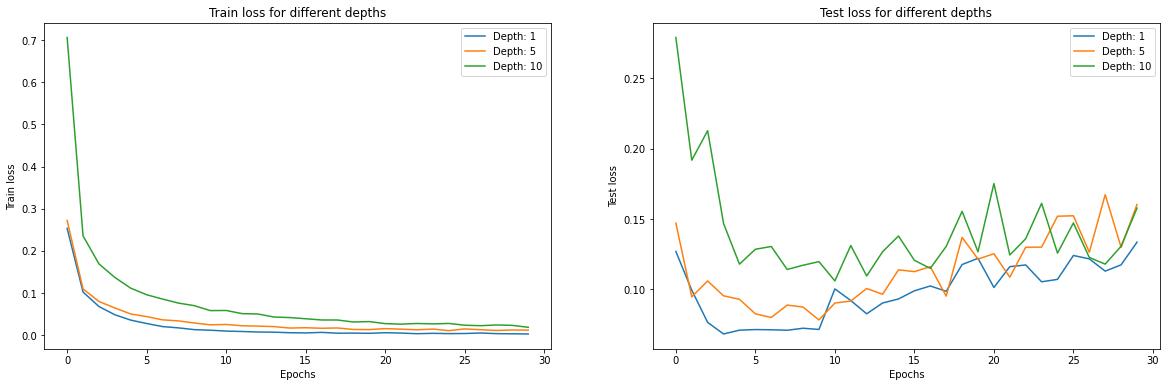

In [11]:
# Plot the train loss for different depths and test loss for different depths as subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
for depth in depths:
    ax[0].plot(store_depth[depth][0], label=f"Depth: {depth}")
    ax[1].plot(store_depth[depth][1], label=f"Depth: {depth}")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Train loss")
ax[0].legend()
ax[0].title.set_text("Train loss for different depths")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Test loss")
ax[1].legend()
ax[1].title.set_text("Test loss for different depths")
plt.show()


In the left graph, the training loss for all models is observed to be decreasing, indicating that each model is converging. However, the convergence rate varies among the models; notably, the neural network with a depth of 1 converges more rapidly than that with a depth of 10.

On the right graph, in a similar vein, the test loss for all three neural networks diminishes as the number of epochs increases, with some variance and potentially overfitting after 10 epochs as the test loss begins to increase. Yet, the neural network with a depth of 1 exhibits a lower test loss compared to those with depths of 5 and 10, suggesting it is the most effective model among those tested. It might be hypothesized that the neural network with a depth of 10 overfits the training data due to overparameterization, which would account for its higher test loss compared to the model with a depth of 1. However, this hypothesis does not hold in this instance, as the training loss for the neural network with a depth of 10 is actually higher than that for the neural network with a depth of 1, suggesting that its primary challenge is achieving optimal convergence in a more complex loss landscape.

Upon fine-tuning the parameters to enable convergence across various network depths, intriguing findings emerge. The plots reveal that training becomes increasingly challenging with network depth; deeper networks exhibit slower convergence rates, necessitating more epochs to achieve convergence. This observation aligns with theoretical expectations, as deeper models navigate more complex loss landscapes, making optimization more difficult. Deep neural networks are more susceptible to getting trapped in local minima and may encounter issues with vanishing or exploding gradients, leading to slow or erratic training. In contrast, shallower networks, with fewer layers and parameters, tend to be simpler to train.

Additionally, the test loss plot indicates that deeper neural networks incur higher test losses. This can be attributed to the increased capacity of deeper networks to overfit the training data, as their larger number of parameters allows them to more precisely model the training set but also makes them more prone to adapting to noise. Conversely, shallower networks, with their reduced parameter count, are less likely to overfit. However, the observed discrepancy in test losses might also reflect the deeper networks' struggle with optimal convergence due to the intricate loss landscape. It's conceivable that extending the training duration for the deeper network could potentially lower its test loss relative to the neural network with a depth of 1.

In [12]:
# Define the hyperparameters
widths = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
depth = 1
lr = 0.001
epochs = 30
batch_size = 32
dim = 784
nclass = 10
Adam = True

# Store the results
store_widths = {}

# Run the main function
for width in widths:
    print(f"Width: {width}")
    train_loss, test_loss, train_error, test_error = main(batch_size, dim, nclass, width, depth, lr, epochs, train_set_mnist, test_set_mnist, Adam=Adam)
    store_widths[width] = [train_loss, test_loss, train_error, test_error]

Width: 4


Epoch: 001 | Train Loss: 1.067 | Test Loss: 0.7005 | Train Error: 0.3419 | Test Error: 0.2108
Epoch: 002 | Train Loss: 0.6517 | Test Loss: 0.5934 | Train Error: 0.1941 | Test Error: 0.1751
Epoch: 003 | Train Loss: 0.5739 | Test Loss: 0.546 | Train Error: 0.1687 | Test Error: 0.1614
Epoch: 004 | Train Loss: 0.5298 | Test Loss: 0.5069 | Train Error: 0.1532 | Test Error: 0.1463
Epoch: 005 | Train Loss: 0.4999 | Test Loss: 0.489 | Train Error: 0.1438 | Test Error: 0.141
Epoch: 006 | Train Loss: 0.4812 | Test Loss: 0.4763 | Train Error: 0.1381 | Test Error: 0.1378
Epoch: 007 | Train Loss: 0.4679 | Test Loss: 0.4649 | Train Error: 0.1343 | Test Error: 0.1312
Epoch: 008 | Train Loss: 0.4582 | Test Loss: 0.4604 | Train Error: 0.1303 | Test Error: 0.1318
Epoch: 009 | Train Loss: 0.451 | Test Loss: 0.4617 | Train Error: 0.1283 | Test Error: 0.1341
Epoch: 010 | Train Loss: 0.4454 | Test Loss: 0.4522 | Train Error: 0.1269 | Test Error: 0.1292
Epoch: 011 | Train Loss: 0.4406 | Test Loss: 0.4548 | T

In [13]:
df = pd.DataFrame(columns=["Width", "Train loss", "Test loss"])
for width in widths:
    df = pd.concat([df, pd.DataFrame([[width, store_widths[width][0][-1], store_widths[width][1][-1]]], columns=["Width", "Train loss", "Test loss"])])
df.reset_index(drop=True, inplace=True)
df

,Width,Train loss,Test loss
0,4,0.411669,0.43851
1,8,0.210912,0.2433
2,16,0.09413,0.169243
3,32,0.023074,0.150824
4,64,0.005859,0.142004
5,128,0.002702,0.132554
6,256,0.004068,0.11339
7,512,0.003966,0.157918
8,1024,0.007438,0.136038


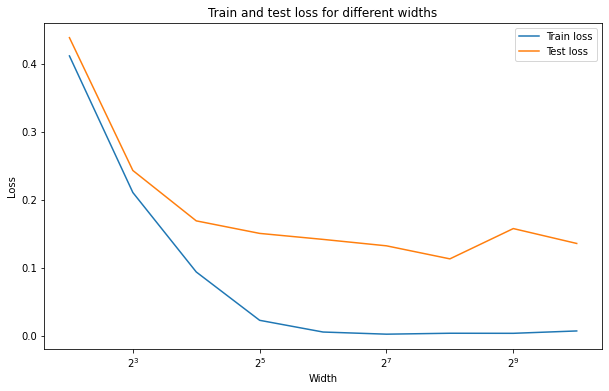

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(widths, [store_widths[width][0][-1] for width in widths], label="Train loss")
plt.plot(widths, [store_widths[width][1][-1] for width in widths], label="Test loss")
plt.legend()
plt.title("Train and test loss for different widths")
plt.xscale("log", base=2)
plt.xlabel("Width")
plt.ylabel("Loss")
plt.show()

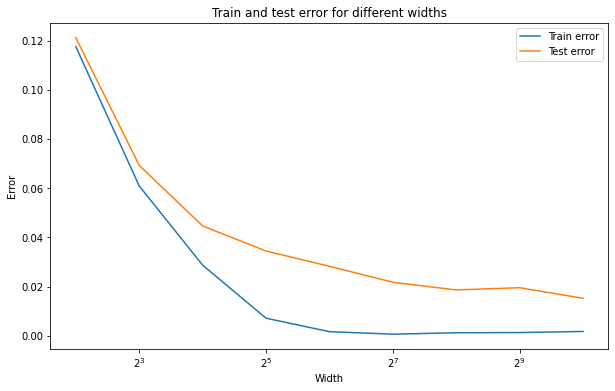

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(widths, [store_widths[width][2][-1] for width in widths], label="Train error")
plt.plot(widths, [store_widths[width][3][-1] for width in widths], label="Test error")
plt.xscale("log", base=2)
plt.xlabel("Width")
plt.ylabel("Error")
plt.legend()
plt.title("Train and test error for different widths")
plt.show()


Upon analysing the training and testing errors through graphical representation, we observe a pattern that aligns closely with our expectations set forth in the assignment, particularly when adhering to the specified window size. Notably, there's a discernible decrease in training loss as network width—or the number of neurons within each hidden layer—expands. This trend underscores the principle that a neural network's complexity, and consequently its ability to model the training data, escalates with increased neuronal count. Consistent with the assignment's guidance, the testing error mirrors this behavior, diminishing as network width grows.

The compiled data from training various neural network configurations reveals a clear correlation between network width and error rates: both training and testing errors recede as the width broadens. This phenomenon aligns with insights from recent research, which suggests that testing error either continues to decrease or remains stable, even as the network's parameter count significantly escalates. Contrary to traditional generalisation bounds—which would predict an uptick in testing error due to overfitting at a certain parameter threshold—our observations corroborate the continuous improvement in error rates with increasing width. Our findings, mirroring those anticipated in the exercise guidelines, indicate a successful replication of the expected outcome.

Furthermore, the lectures highlight that increased network width tends to enhance the convexity of the optimisation landscape, thereby facilitating a more effective fit to the data. It is therefore logical and anticipated that both training and testing errors would decline as network width is augmented. Our analysis suggests that we have identified a set of configuration parameters where both test error and loss diminish in tandem with an increase in network parameters.

However, it's worth noting that an optimal network width seems to be around 64 neurons per hidden layer, marked by a significant reduction in both testing error and loss. Beyond this point, the risk of overfitting becomes pronounced due to potential over-parameterisation, cautioning against excessively expanding the network width.


***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

We consider now a fully-connected single hidden-layer neural network. The input is of dimensionality $N_0$ and we have $N_1$ hidden nodes in layer 1 and $N_2$ output nodes. The activation function is given by $\phi$. The output for node $i$ in the first layer is given by
$$f_i^{(1)}(x)=\sum_{j=1}^{N_0}w_{ij}^{(1)}x_j+b_i^{(1)},$$
where $w_{ij}^{(1)}$ is the component of the weight matrix connecting node $i$ in layer 1 with inpu $j$ and $b_i^{(1)}$ is the bias we add in layer 1 to output node $i$. This is passed though the nonlinearity to obtain
$$g_i^{(1)}(x)=\phi(f_i^{(1)}(x))$$
The output layer is consequently given by
$$f_i^{(2)}(x)=\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)+b_i^{(2)}$$

We assume an i.i.d distribution on the parameters, namely

\begin{align*}
  w_{ij}^{(l)}&\overset{\text{i.i.d}}{\sim} N(0, C_w^{(l)})\\
  b_{i}^{(l)}&\overset{\text{i.i.d}}{\sim} N(0, \sigma_b^{(l)})
\end{align*}

### Task 1: Proper weight scaling

We scale to ensure finite variance when taking width limits in succesion so that we can apply the multivariate Central Limit Theorem.

The CLT states that the sum of a sample of $N$ i.i.d variables with finite variance will converge in distribution $N(N\mu, N\sigma^2)$. Scaling $\sigma^2$ by $\frac{1}{N}$ ensures constant variance.

### Task 2: Derive the GP relation for a single hidden layer

In this section we take inspiration from Matthews et el.

Note that because weights and biases are taken to be i.i.d, the post activations $g_j^{(1)}, g_{j'}^{(1)}$ are independent for $j\neq j'$.

We aim to show that $f_i^{(2)}(x)$ converges to a Gaussian process with mean $\mu^1$ and covariance matrix $K^1$. Since $f_i^{(2)}(x)$ is a sum of i.i.d terms, it follows from the Central Limit Theorem that in the limit $N_1\to\infty$, $f_i^{(2)}(x)$ will be Gaussian distributed. We read from the definition that the hidden-to-output layer interactions can be written in matrix-vector multiplcations as
$f^{(2)}=w^{(2)}g^{(1)}(x)+b^{(2)}$. Therefore, from the *multivariate* Central Limit Theorem, any finite collection $\{f_i^{(2)}(x^{\alpha_1}), \dots, f_i^{(2)}(x^{\alpha_k})\}$ for distinct inputs $\alpha_1, \dots ,\alpha_k$ will have a joint multivariate Gaussian distribution, which is exactly the definition of a Gaussian process. Consider the vector

\begin{equation*}
F^{(2)}=
\begin{pmatrix}f^{(2)}(x)\\f^{(2)}(x')
\end{pmatrix}=
\begin{pmatrix}b^{(2)}\\b^{(2)}
\end{pmatrix}
+\sum_{j=1}^{N_0}\begin{pmatrix}w_{:,j}^{(2)}\phi(w_{:,j}^{(1)}x+b_j^{(1)})\\
w_{:,j}^{(2)}\phi(w_{:,j}^{(1)}x'+b_j^{(1)})
\end{pmatrix}
\end{equation*}


Writing the relationship in this format clearly indicates that the multivariate central limit theorem can be applied. Each vector term on the right-hand side, given the inputs $x $ and $x' $, is independent and identically distributed. It is assumed that the variances of the activities are bounded. The chosen scaling for the variances aligns perfectly with the conditions required for the central limit theorem to hold and is consistent with the initialization strategies most commonly employed in practice. Consequently, as the number of units $ H $ increases, $ F^{(2)} $ tends toward a multivariate normal distribution in terms of distribution. The eventual normal distribution is completely characterized by its mean and covariance. We therefore conclude that $f_i^{(2)}\sim \mathcal{GP}(\mu^1, K^1)$ for some $\mu^1, K^1$ to be determined.

Because parameters are zero mean, we conclude $\mu^1(x)=0$. To calculate covariance matrix $K$ recall that
\begin{align*}
K^1(x,x')&=\mathbb{E}\left[f_i^{(2)}(x)f_i^{(2)}(x')\right]\\
&= \mathbb{E} \left[ \left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x) + b_i^{(2)} \right) \left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x') + b_i^{(2)} \right) \right]\\
&=\mathbb{E} \left[ \left(\sum_{k=1} \sum_{j=1} w_{ik}^{(2)}g_{k}^{(1)}(x) w_{ij}^{(2)}g_{j}^{(1)}(x')\right) + 2b_i^{(2)}\left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x)\right) +(b_i^{(2)})^2\right]\\
&=\mathbb{E} \left[ \left(\sum_{k=1} \sum_{j=1} w_{ik}^{(2)}g_{k}^{(1)}(x) w_{ij}^{(2)}g_{j}^{(1)}(x')\right)\right] + \mathbb{E}\left[2b_i^{(2)}\left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x)\right)\right] + \mathbb{E}\left[(b_i^{(2)})^2\right]\\
&=\mathbb{E} \left[ \left(\sum_{k=1} \sum_{j=1} w_{ik}^{(2)}g_{k}^{(1)}(x) w_{ij}^{(2)}g_{j}^{(1)}(x')\right)\right] + \underbrace{\mathbb{E}\left[2b_i^{(2)}\right]}_{=0}∑_j \underbrace{\mathbb{E}\left[  w_{i,j}^{(2)}g_j^{(1)}(x)\right]}_{=0} + \mathbb{E}\left[(b_i^{(2)})^2\right]\\
&= \sigma_b^2+\sigma_w^2\mathbb{E}\left[g_i^{(1)}(x)g_i^{(1)}(x')\right]
\end{align*}
where the expectation in the RHS depends on the choice of activation function $\phi$ and whose analytical computation will require integrating over the distribution of $w^{(1)}, b^{(1)}$.

*Note that, when expanding out the double sum $\left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x) + b_i^{(2)} \right) \left( ∑_j w_{i,j}^{(2)}g_j^{(1)}(x') + b_i^{(2)} \right)$ we have only two nonzero terms (by independence and the zero-mean nature of the bias), namely $\mathbb{E}\left[(b_i^{(2)})^2\right]$, which is exactly $σ_b^2$, and $$\mathbb{E} \left[ \sum_{k=1} \sum_{j=1} w_{ik}^{(2)}g_{k}^{(1)}(x) w_{ij}^{(2)}g_{j}^{(1)}(x')  \right] = \mathbb{E} \left[ (w_{ii}^{(2)}) ^2 g_{i}^{(1)}(x)g_{i}^{(1)}(x')  \right] = \sigma_w^2 \mathbb{E} \left[ g_{i}^{(1)}(x)g_{i}^{(1)}(x')  \right]$$
where we remove all terms such that $i\neq 
k\neq j$ by independence of the weights with one another, and the fact that all terms are zero-mean.*

### Task 3: Why in succession

We seek to extend this argument to deeper layers inductively; therefore, we require using the argument above that the previous layer is already distributed according to a Gaussian process. As such, we take the limits $N_1\to\infty, N_2\to\infty\dots$ in succession to allow application of the induction hypothesis. This is required for application of the multivariate CLT.

We should note it is possible to derive this GP relation without sequential limits; see for example Appendix C of [Lee et al. (2018)](https://link.springer.com/chapter/10.1007/978-1-4612-0745-0_2).


### Task 4: Derive the GP relation for multiple hidden layers



We will show that for arbitrary layer $l$ the output
\begin{equation}f_i^{(l)}(x)=\sum_{j=1}^{N_l}w_{ij}^{(l)}g_j^{(l-1)}(x)+b_i^{(l)}\end{equation}
with $g_J^{(l-1)}(x)=\phi(f_j^{(l-1)}(x))$
is a Gaussian process with mean $\mu^l$ and covariance matrix $K^l$.

We assume that $f_i^{(l-1)}$ is a Gaussian process, i.i.d for each $i$, and that $g_i^{(l-1)}(x)$ are i.i.d. The computation in the $l$th layer is as as above. As before, $f_i^{(l)}(x)$ is a sum of i.i.d random variables so that as $N_l\to\infty$ any finite collection $\{f_i^{(l)}(x^{\alpha_1}), \dots, f_i^{(l)}(x^{\alpha_k})\}$ will have a joint multivariate Gaussian distribution by the multivariate Central Limit Theorem. We can apply this because of the scaling of the variance $C_w^{(l)}=\frac{\sigma_w^{(l)}}{N_{l-1}}$ which ensures that in each layer the variance is finite and constant.

The variables $\{f_i^{(l)}\}$ will therefore be disributed according to a GP with mean $\mu^l$ and covariance $K^l$. As before, the mean $\mu^l$ is trivially zero. The covariance is given by
\begin{align*}
K^l(x,x')&=\mathbb{E}\left[\left(f_i^{(l)}(x)-\mu^l\right)\left(f_i^{(l)}(x')-\mu^l\right)\right]\\
&= \mathbb{E} \left[ \left( ∑_j w_{i,j}^{(l)}g_j^{(l-1)}(x) + b_i^{(l)} \right) \left( ∑_j w_{i,j}^{(l)}g_j^{(l-1)}(x') + b_i^{(l)} \right) \right] \; .\\
&= \sigma_b^2+\sigma_w^2\mathbb{E}\left[g_i^{(l-1)}(x)g_i^{(l-1)}(x')\right]\\
&=\sigma_b^2+\sigma_w^2\mathbb{E}\left[\phi\left(f_i^{(l-1)}(x)\right)\phi\left(f_i^{(l-1)}(x')\right)\right]
\end{align*}

where the expectation is taken over the Gaussian process $f_i^{(l-1)}\sim \mathcal{GP}(0, K^{l-1})$ and we use the logic from the previous part to reduce the expectation.

*NB. Formally, we can represent $w^{(l)}_{i, j} = \frac{1}{\sqrt{N_l}} X_{ij}^{(l)}$ where $X_{ij}^{(l)} \sim \mathcal{N}(0, \sigma_w^{(l)})$. Then the sum over $w$ becomes $S_{N_l} = \frac{1}{\sqrt{N_l}} \sum_{j=1}^{N_l}X_{ij}^{(l)} \to \mathcal{N}(0, K^l), \; N_l \to \infty$ where we used the fact the $\mathbb{E}[X_{ij}^{(l)}]=0$.*

***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

We write code to load, filter, subsample, and prepare datasets from CIFAR-10 for machine learning tasks using PyTorch. We set the default tensor type to `torch.float64` for precision as requested by the problem description. A transformation to convert images to PyTorch tensors is defined using `transforms.ToTensor()`.

The CIFAR-10 dataset is then loaded for both training and testing purposes from the `./data` directory, applying the defined transformation to convert images into tensor format. We filter images belonging to classes with indices 3 and 9, which correspond to Cat and Truck, mapping these to labels -0.5 and +0.5, to facilitate learning with a Gaussian process. We randomly subsample 1000 instances from each set for both training and testing.

We prepare subsampled datasets for training and testing using `torch.utils.data.Subset`, flatten images for processing, remap class labels to their corresponding numerical values, and return input and label matrices.

DataLoaders for the subsampled training and testing datasets are created with a batch size of 1. This setup enables efficient data extraction into matrices.

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

torch.set_default_dtype(torch.float64)

# Transformation definition
transform = transforms.Compose([
    transforms.ToTensor()
])

# Dataset loading
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Class filtering and subsampling
class_indices = {3: -0.5, 9: 0.5}
filtered_train_indices = [i for i, label in enumerate(trainset.targets) if label in class_indices]
filtered_test_indices = [i for i, label in enumerate(testset.targets) if label in class_indices]

subsample_train_indices = np.random.choice(filtered_train_indices, 1000, replace=False)

subsample_test_indices = np.random.choice(filtered_test_indices, 1000, replace=False)

# Prepare datasets
subsampled_train_dataset = torch.utils.data.Subset(trainset, subsample_train_indices)
subsampled_test_dataset = torch.utils.data.Subset(testset, subsample_test_indices)

# Function to extract data as matrices
def extract_data(loader, images=False):
    """
    Extracts the data from a DataLoader.
    
    Args:
        loader: torch.utils.data.DataLoader, the data loader
        images: bool, whether to return images
    Returns:
        X: torch.Tensor, the input data
        y: torch.Tensor, the labels
    """
    X, y = [], []
    if images:
        X_images = []
    for data in loader:
        inputs, labels = data
        if images:
          X_images.append(inputs)
        inputs = inputs.reshape(inputs.shape[0], -1)  # Flatten the image
        label = torch.tensor([class_indices[labels.item()]], dtype=torch.float64)  # Remap labels to -0.5 and +0.5
        X.append(inputs)
        y.append(label)
    if images:
        return X_images
    X = torch.cat(X).to(dtype=torch.float64)  # Convert to float64
    y = torch.cat(y).to(dtype=torch.float64)  # Convert to float64
    return X, y

# Creating DataLoaders
trainloader = torch.utils.data.DataLoader(subsampled_train_dataset, batch_size=1, shuffle=False)
testloader = torch.utils.data.DataLoader(subsampled_test_dataset, batch_size=1, shuffle=False)

# Extract matrices
X, y = extract_data(trainloader)
X_star, y_star = extract_data(testloader)

# Print shapes and types to verify
print("Training X shape and type:", X.shape, X.dtype)
print("Training y shape and type:", y.shape, y.dtype)
print("Test X* shape and type:", X_star.shape, X_star.dtype)
print("Test y* shape and type:", y_star.shape, y_star.dtype)


100%|██████████| 170498071/170498071 [00:12<00:00, 14169920.96it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training X shape and type: torch.Size([1000, 3072]) torch.float64
Training y shape and type: torch.Size([1000]) torch.float64
Test X* shape and type: torch.Size([1000, 3072]) torch.float64
Test y* shape and type: torch.Size([1000]) torch.float64


We define a function to implement a kernel operation, structured within a class hierarchy where `Kernel` serves as the base class, outlining the framework for kernel functions, similar to the exercise notebook from Week 3. The `Kernel` class is abstract, requiring subclasses to override its methods for specific implementations. The `ReLUKernel` class, inheriting from `Kernel`, is tailored to compute the kernel between inputs using the ReLU activation function, encapsulating the computation within its `__call__` method.

Upon initialization, `ReLUKernel` takes a dictionary of parameters including `L` (depth of the neural network), `sigma_w_sq` (variance of the weights), and `sigma_b_sq` (variance of the biases). The core computation occurs when the `__call__` method is invoked with two input tensors, `X1` and `X2`. It calculates the kernel matrix between these inputs through an iterative process that emulates the effect of applying the ReLU activation function across `L` layers of a neural network.

- Initial kernel matrices `Kxxprime`, `Kxx`, and `Kxprimexprime` are calculated based on the dot product of the inputs, scaled by the weight variance `sigma_w` and bias variance `sigma_b`, and normalized by the feature dimension `N`.
- For each layer from 1 to `L`, it updates these kernel matrices by applying transformations that mimic the non-linear activation through ReLU. This involves calculating angles (`thetaxxprime`, `thetaxx`, `thetaxprimexprime`) between the points in the feature space and using these angles to adjust the kernel matrices to account for the ReLU transformation.
- The final result, `Kxxprime`, represents the kernel matrix after applying `L` layers of transformations, capturing the similarity between inputs `X1` and `X2` as processed by a deep neural network with ReLU activations.

This implementation leverages PyTorch for tensor operations, enabling efficient computation of the kernels.

In [17]:

class Kernel:
  """
  Base Kernel class. Methods should be overwritten.
  """

  def __init__(self, params : dict):
    pass

  def __call__(self, x1, x2):
    raise NotImplementedError()


class ReLUKernel(Kernel):
    """
    ReLU kernel.

    Args:
        params: dict, the parameters of the kernel
    """
    def __init__(self, params: dict):
        self.L = params['L']
        self.sigma_w_sq = params['sigma_w_sq']
        self.sigma_b_sq = params['sigma_b_sq']

    def __call__(self, X1, X2):
        """
        Compute the kernel matrix.
        Args: 
            X1: torch.Tensor, the first input matrix
            X2: torch.Tensor, the second input matrix
        """
        L = self.L
        sigma_w = self.sigma_w_sq
        sigma_b = self.sigma_b_sq


        M1, N = X1.shape
        M2, _ = X2.shape

        Kxxprime = sigma_b + sigma_w * (X1 @ X2.t() / N)
        Kxx_vect = torch.diag(sigma_b + sigma_w * (X1 @ X1.t() / N))
        Kxx = Kxx_vect.view(-1, 1).expand(-1, M2)
        Kxprimexprime_vect = torch.diag(sigma_b + sigma_w * (X2 @ X2.t() / N))
        Kxprimexprime = Kxprimexprime_vect.view(1, -1).expand(M1, -1)

        for l in range(1, L + 1):
            thetaxxprime = torch.acos(Kxxprime / torch.sqrt(Kxx * Kxprimexprime))
            thetaxx = torch.acos(Kxx / torch.sqrt(Kxx * Kxx))
            thetaxprimexprime = torch.acos(Kxprimexprime / torch.sqrt(Kxprimexprime * Kxprimexprime))

            Kxxprime = sigma_b + (sigma_w / (2 * torch.pi)) * torch.sqrt(Kxx * Kxprimexprime) * (torch.sin(thetaxxprime) + (torch.pi - thetaxxprime) * torch.cos(thetaxxprime))
            Kxx = sigma_b + (sigma_w / (2 * torch.pi)) * torch.sqrt(Kxx * Kxx) * (torch.sin(thetaxx) + (torch.pi - thetaxx) * torch.cos(thetaxx))
            Kxprimexprime = sigma_b + (sigma_w / (2 * torch.pi)) * torch.sqrt(Kxprimexprime * Kxprimexprime) * (torch.sin(thetaxprimexprime) + (torch.pi - thetaxprimexprime) * torch.cos(thetaxprimexprime))

        return Kxxprime



We define a class `GP` to encapsulate a Gaussian Process model, leveraging a provided kernel function to model and predict outcomes based on observations.

The `predict` method of the `GP` class takes in new test points `x_star`, along with observed data points `X` and their corresponding responses `y`. It also allows specifying the number of posterior samples to draw (`size`) and the noise level (`sigma`) in the observations. The core functionality of this method is to fit the GP model to the observations and to predict the outcomes at the test points by drawing samples from the posterior distribution defined by the fitted model.

The method starts by computing several kernel matrices: `k_xs_x` (covariance between test points and observed points), `k_x_xs` (transpose of `k_xs_x`), `k_xs_xs` (covariance between test points), and `k_x_x` (covariance between observed points). It then adds noise variance to the diagonal of `k_x_x` to form the observed covariance matrix `cov_x_x`, accounting for observation noise.

Using these matrices, the method calculates the posterior mean and variance of the predictions at the test points. The posterior mean provides the best guess of the function values at `x_star`, while the posterior variance captures the uncertainty around these predictions.

To ensure numerical stability and the mathematical properties of covariance matrices, the method enforces symmetry and positive definiteness on the computed posterior variance. This is done by averaging the matrix with its transpose and adding a small noise term to the diagonal elements.

Finally, the method draws samples from a multivariate normal distribution defined by the posterior mean and variance, providing a probabilistic forecast for the test points. The posterior variance is then adjusted to remove the diagonal variance so that later, when we compute the `argmax`, the result is the largest covariance, rather than the largest variance.

In [18]:
class GP:
    def __init__(self, kernel):
        """
        Initialize the Gaussian Process (GP) with a specified kernel.

        Args:
        kernel (callable): The kernel function to use in the GP.
        """
        self.k = kernel

    def predict(self, x_star, X=None, y=None, size=1, sigma=0.):
        """
        Given observations (X, y) and test points x_star, fit a GP model
        and draw posterior samples for f(x_star) from the fitted model.

        Args:
        x_star (torch.Tensor): Test points at which predictions will be made.
        X (torch.Tensor): Observed features.
        y (torch.Tensor): Observed response variables.
        size (int): Number of posterior samples to draw.
        sigma (float): Noise level in observations.

        Returns:
        torch.Tensor: Posterior samples for f(x_star).
        """

        # Compute kernel matrices
        k_xs_x   = self.k(x_star, X)       # m x n
        k_x_xs   = k_xs_x.T                 # n x m
        k_xs_xs  = self.k(x_star, x_star)  # m x m
        k_x_x    = self.k(X, X)            # n x n
        cov_x_x  = k_x_x + sigma**2 * torch.eye(X.shape[0])  # n x n

        # Compute posterior mean and covariance
        posterior_mean = torch.matmul(k_xs_x, torch.linalg.solve(cov_x_x, y))
        posterior_var = k_xs_xs - torch.matmul(k_xs_x, torch.linalg.solve(cov_x_x, k_x_xs))

        # The below is taken directly from the Week 3 notebook
        # -----------------------------------------------------------------------------------
        # Enforce symmetry and positive definiteness that may be lost due to numerical errors
        posterior_var = (posterior_var + posterior_var.T) / 2  # Enforce symmetry
        # Add a small amount of noise to the diagonal to make the covariance matrix positive definite
        posterior_var = posterior_var + 1e-6 * torch.eye(posterior_var.shape[0])
        # -----------------------------------------------------------------------------------

        self.posterior_mean = posterior_mean

        # Draw samples from the posterior distribution
        y_star = torch.distributions.MultivariateNormal(posterior_mean, posterior_var).sample((size,))

        ind = np.diag_indices(posterior_var.shape[0])
        posterior_var[ind[0], ind[1]] = torch.zeros(posterior_var.shape[0])
        self.posterior_var = posterior_var


        return y_star



We now perform an exploratory analysis through grid search to identify the optimal configuration for the GP, aiming to maximize prediction accuracy on a given dataset.

The exploration is conducted over predefined ranges for each hyperparameter:
- `Lrange` represents the range of depths from 1 to 10.
- `sigma_b_range` and `sigma_w_range` include several values from very low (0.01) to relatively high (5), covering a broad spectrum of variance settings for biases and weights, respectively.

We iterate through every possible combination of `L`, `sigma_b_sq`, and `sigma_w_sq`, creating a new `ReLUKernel` with the current set of parameters for each iteration. This kernel is then used to initialize a GP model, which is applied to predict outcomes for a test set (`X_star`) based on training data (`X`, `y`).

Predictions are made, and their accuracy is computed by comparing the predicted labels (`y_pred`) against the true labels (`y_star`). The comparison is binary, with predictions thresholded at 0 to produce binary outcomes of 0.5 or -0.5, which are then compared to the actual binary labels to calculate accuracy.

Due to the nature of GP models and the numerical stability issues that can arise (most commonly, the covariance matrix not being positive semi-definite), we employ a try-except block to handle potential errors during prediction. If an error occurs, the accuracy for that parameter set is recorded as 0.

The script tracks the highest accuracy observed (`best_acc`) and the parameters that achieved this accuracy (`best_params`).

In [19]:
Lrange = list(range(1, 11))
sigma_b_range = [0.01, 0.1, 0.2, 0.5, 1, 2, 5]
sigma_w_range = [0.01, 0.1, 0.2, 0.5, 1, 2, 5]

all_acc = np.zeros((len(Lrange), len(sigma_b_range), len(sigma_w_range)))

best_acc = 0

for i, L in enumerate(Lrange):
  print(i)
  for j, b in enumerate(sigma_b_range):
    for k, w in enumerate(sigma_w_range):
      params = {'L': L, 'sigma_b_sq': b, 'sigma_w_sq': w}
      relu = ReLUKernel(params)
      gp = GP(relu)
      try:
        y_pred = gp.predict(X_star, X, y, size=1, sigma=0.1)
        y_pred = torch.where(y_pred > 0, 0.5, -0.5)[0]
        accuracy = torch.sum(y_pred == y_star) / len(y_pred)
      except: # Sometimes get error that covariance is not pos semidefinite
        accuracy = 0
      all_acc[i, j, k] = accuracy
      if accuracy > best_acc:
        best_params = (L, b, w)
        best_acc = accuracy
%store all_acc

0


1
2
3
4
5
6
7
8
9
Stored 'all_acc' (ndarray)


Below we print the `best_params`

In [20]:
best_params

(7, 0.01, 2)

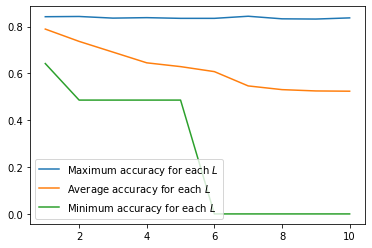

In [21]:
plt.figure()
plt.plot(Lrange, all_acc.max(axis=1).max(axis=1), label="Maximum accuracy for each $L$")
plt.plot(Lrange, all_acc.mean(axis=1).mean(axis=1), label='Average accuracy for each $L$')
plt.plot(Lrange, all_acc.min(axis=1).min(axis=1), label="Minimum accuracy for each $L$")
plt.legend()
plt.show()

The above graph depicts the relationship between the depth of the neural network-like structure (denoted as \( L \)) and the accuracy of a Gaussian Process (GP) model with a ReLU kernel. Three lines represent the maximum, average, and minimum accuracy achieved for each depth level ranging from 1 to 10.

- **Maximum Accuracy (Blue Line)**: This line remains relatively constant across different depths, indicating that the best-case performance of the model does not significantly improve or degrade as the depth increases. The model's best performance is achieved at low depth and is maintained as  $L$ increases.

- **Average Accuracy (Orange Line)**: The average accuracy appears to decrease as the depth increases. Initially, the decrease is gradual, but after $ L = 4 $, the rate of decrease becomes more pronounced. This suggests that on average, increasing the depth of the network structure beyond a certain point may lead to a reduction in performance, possibly due to overfitting or increased model complexity.

- **Minimum Accuracy (Green Line)**: The minimum accuracy shows a sharp drop after $ L = 2 $, reaching the lowest point at $ L = 3 $ and remaining constant thereafter. This indicates that there are some configurations of the GP model (i.e combinations of $ \sigma_b $ and $ \sigma_w $) that result in poor performance, particularly at greater depths. This might reflect instances where the model is highly sensitive to the choice of hyperparameters or where certain configurations are not suitable for deeper structures. Specifically, when the accuracy is 0, it means that the GP has failed due to numerical issues. This seems toonly occur for $L\geq 6$

While the optimal performance of the GP model does not vary with depth, the average and worst-case performances tend to decrease. This could imply that the benefits of increasing depth in this context are limited and that there is a potential for decreased robustness or increased variability in model performance at higher depths. It also highlights the importance of careful hyperparameter selection, especially as the depth of the model increases.

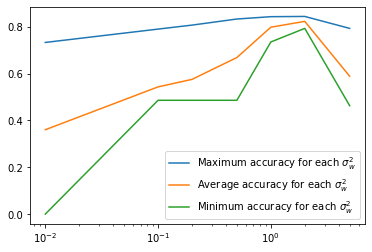

In [22]:
plt.figure()
plt.plot(sigma_b_range, all_acc.max(axis=0).max(axis=0), label="Maximum accuracy for each $\sigma^2_w$")
plt.plot(sigma_b_range, all_acc.mean(axis=0).mean(axis=0), label='Average accuracy for each $\sigma^2_w$')
plt.plot(sigma_b_range, all_acc.min(axis=0).min(axis=0), label="Minimum accuracy for each $\sigma^2_w$")
plt.xscale('log')
plt.legend()
plt.show()

The above graph represents the relationship between the variance of the weights $ \sigma_w^2$ , on a logarithmic scale, and the accuracy of the GP. Again we plot three lines, each representing the maximum, average, and minimum accuracy achieved for varying levels of $ \sigma_w^2 $.

- **Maximum Accuracy (Blue Line)**: This line trends upward initially as $\sigma_w^2 $ increases, reaching a plateau before slightly declining. This suggests that up to a certain point, increasing the weight variance improves the model's performance, possibly by allowing greater flexibility. However, beyond a certain level of $ \sigma_w^2 $, the accuracy either saturates or begins to diminish, possibly due to overfitting or instability in the model predictions due to the excess posterior covariance. We would expect higher $\sigma_w$ in the prior to yield higher variance in the posterior predictions due to the nature of the kernel.

- **Average Accuracy (Orange Line)**: The average accuracy shows a steady increase with the increase in $ \sigma_w^2 $ up to a certain peak, after which it declines. The peak indicates an optimal range of $ \sigma_w^2 $ values that, on average, yield the best model performance. Beyond this optimal point, too much variance might be detrimental, reflecting a trade-off between model flexibility and overfitting.

- **Minimum Accuracy (Green Line)**: The minimum accuracy sharply increases with the initial increase in $ \sigma_w^2 $, which implies that higher weight variance is necessary to avoid the worst-case scenarios of model performance. However, similar to the average accuracy, it peaks and then shows a significant drop, suggesting that extremely high variance in the weights can lead to poor model performance in some cases.

In addition, it seems that the model only fails due to non-positive semidefiniteness of the covariance matrix when $\sigma_2^2=0.01$. This may be due to near-deterministic outputs. If we were to rerun, perhaps we would exclude this case.

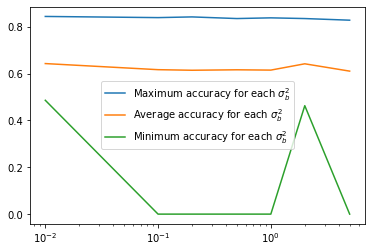

In [23]:
plt.figure()
plt.plot(sigma_b_range, all_acc.max(axis=2).max(axis=0), label="Maximum accuracy for each $\sigma^2_b$")
plt.plot(sigma_b_range, all_acc.mean(axis=2).mean(axis=0), label='Average accuracy for each $\sigma^2_b$')
plt.plot(sigma_b_range, all_acc.min(axis=2).min(axis=0), label="Minimum accuracy for each $\sigma^2_b$")
plt.xscale('log')
plt.legend()
plt.show()

There is not much to be said about the relationship from this graph. It sees that the variance of the biases does not have much impact on the accuracy.

However, what we can discern is that the success of the NNGP is fairly sensitive to parameter choices. Careful selection of the Gaussian prior is required to ensure sensible, accurate and robust predictions, as is shown by the various scenarios in which the minimum accuracy can be fairly low.

In [24]:
for l in range(10):
  argmax = np.argmax(all_acc[l])
  b, w = argmax // 7, argmax % 7
  print (f"Best params for L={l+1}: (sig b, sig w) = {sigma_b_range[b], sigma_w_range[w]}")

Best params for L=1: (sig b, sig w) = (0.2, 1)
Best params for L=2: (sig b, sig w) = (0.01, 1)
Best params for L=3: (sig b, sig w) = (0.2, 1)
Best params for L=4: (sig b, sig w) = (1, 2)
Best params for L=5: (sig b, sig w) = (2, 2)
Best params for L=6: (sig b, sig w) = (0.5, 2)
Best params for L=7: (sig b, sig w) = (0.01, 2)
Best params for L=8: (sig b, sig w) = (0.01, 2)
Best params for L=9: (sig b, sig w) = (0.1, 2)
Best params for L=10: (sig b, sig w) = (0.01, 2)


Above we can see that smaller values of $L$ work better with $\sigma_w^2=1$, and larger values prefer $\sigma_w^2=2$. This is some indication that higher weight variance works better with more layers. On the whole, it seems that increasing the weight variance yields more accurate predictions. This allows the model to adapt to more variance in the images. However, this will likely increase the posterior variance, and thus uncertainty of the predictions. Tuning $\sigma_w^2$ can be likened to the bias-variance tradeoff in tuning a regular neural network.

In [25]:
params = {'L': best_params[0], 'sigma_b_sq': best_params[1], 'sigma_w_sq': best_params[2]}
relu = ReLUKernel(params)
gp = GP(relu)

y_pred = gp.predict(X_star, X, y, size=1, sigma=0.1)
y_pred = torch.where(y_pred > 0, 0.5, -0.5)[0]
torch.sum(y_pred == y_star)


tensor(841)

We see that the highest accuracy obtained in the two-class classification problem is c.84%. This is quite effective for a method that takes c. 4 seconds to train (once hyperparameters have been selected).

Below we plot the two images with the lowest/most negative covariance (the most 'different' images according to the model) and the two images with the highest covariance (the most 'similar')

/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_26790/974095401.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


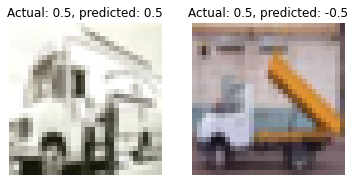

In [30]:
ind1 = gp.posterior_var.argmin() // 1000
ind2 = gp.posterior_var.argmin() % 1000
image1 = X_star[ind1].reshape(3, 32, 32)
image1 = image1.permute(1, 2, 0)
image2 = X_star[ind2].reshape(3, 32, 32)
image2 = image2.permute(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image1)
ax[0].set_title(f"Actual: {y_star[ind1]}, predicted: {y_pred[ind1]}")
ax[0].axis('off')
ax[1].imshow(image2)
ax[1].set_title(f"Actual: {y_star[ind2]}, predicted: {y_pred[ind2]}")
ax[1].axis('off')
fig.show()

Above are the most 'different' images. Very interestingly, they are both trucks. We would expect perhaps that the model would give a cat and a truck. In all fairness, they do look very different.

However, as expected, the model predicts the second image as a cat. This image can be thought of as one which exhibits large negative covariance with other trucks under the posterior of the model.

/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_26790/3273363855.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


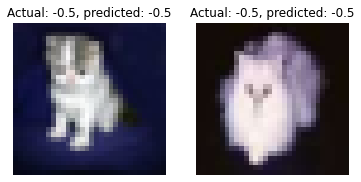

In [29]:
ind1 = gp.posterior_var.argmax() // 1000
ind2 = gp.posterior_var.argmax() % 1000
image1 = X_star[ind1].reshape(3, 32, 32)
image1 = image1.permute(1, 2, 0)
image2 = X_star[ind2].reshape(3, 32, 32)
image2 = image2.permute(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image1)
ax[0].set_title(f"Actual: {y_star[ind1]}, predicted: {y_pred[ind1]}")
ax[0].axis('off')
ax[1].imshow(image2)
ax[1].set_title(f"Actual: {y_star[ind2]}, predicted: {y_pred[ind2]}")
ax[1].axis('off')
fig.show()

As expected, both images are of the same class, predicted and actual. Moreover, they exhibit very similar features: small, white, blob-like cat on a dark background.

#### Computational cost

The computational cost of this algorithm lies in the matrix inverses required to compute the kernel. These will grow cubically with the dimensions of the input matrix.